# Introduction

On va s'intéresser à la visualisation des données

# Import des modules

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des données

In [34]:
df = pd.read_csv('datas_new.csv', index_col=0)

# différents types de graphe sont classiquement utilisés selon la nature des variables x et y observées

### x numérique et y numérique => scatterplot

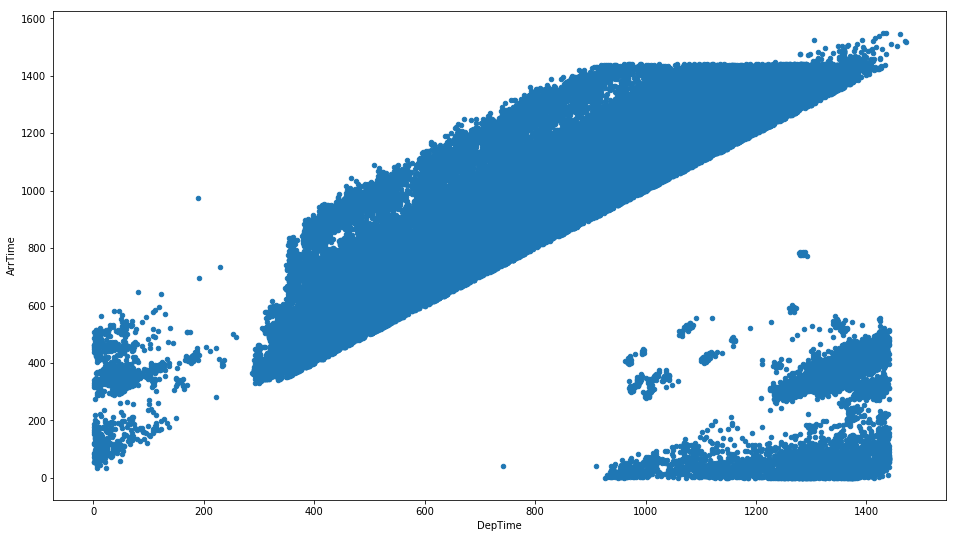

In [35]:
df.plot(x='DepTime', y='ArrTime', kind='scatter', figsize=(16, 9))

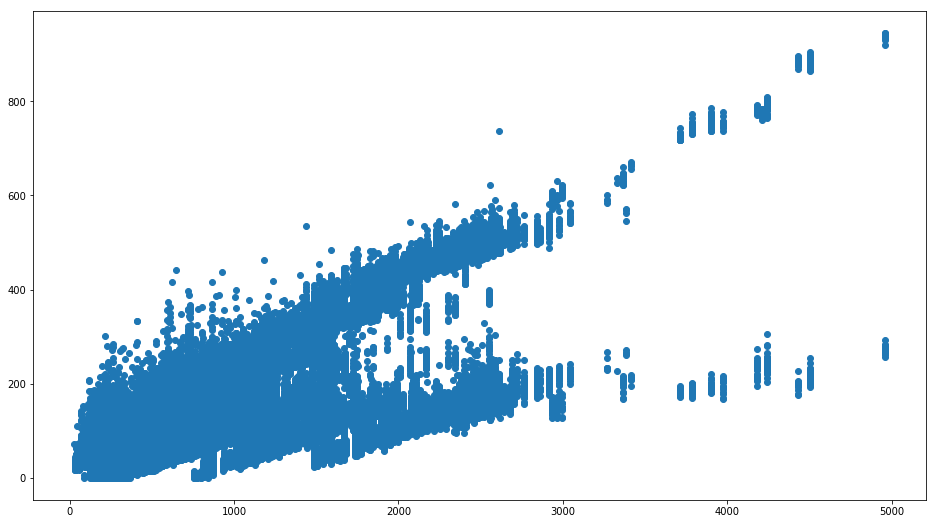

In [36]:
plt.figure(figsize=(16, 9))
plt.scatter(df.Distance, df.FlightTime)

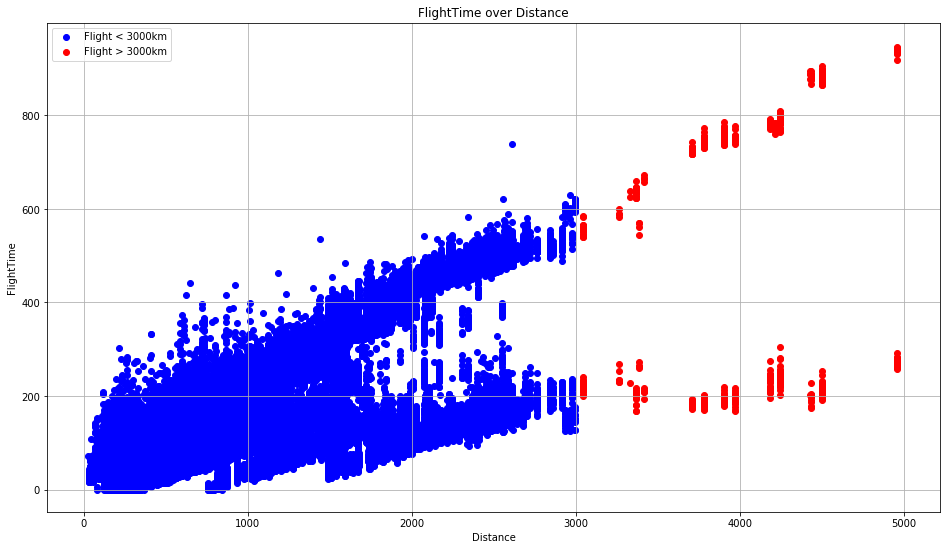

In [37]:
plt.figure(figsize=(16, 9))
plt.scatter(df[df.Distance < 3000].Distance, df[df.Distance < 3000].FlightTime, c='blue', label='Flight < 3000km')
plt.scatter(df[df.Distance > 3000].Distance, df[df.Distance > 3000].FlightTime, c='red', label='Flight > 3000km')
plt.xlabel('Distance')
plt.ylabel('FlightTime')
plt.title('FlightTime over Distance')
plt.grid()
plt.legend()

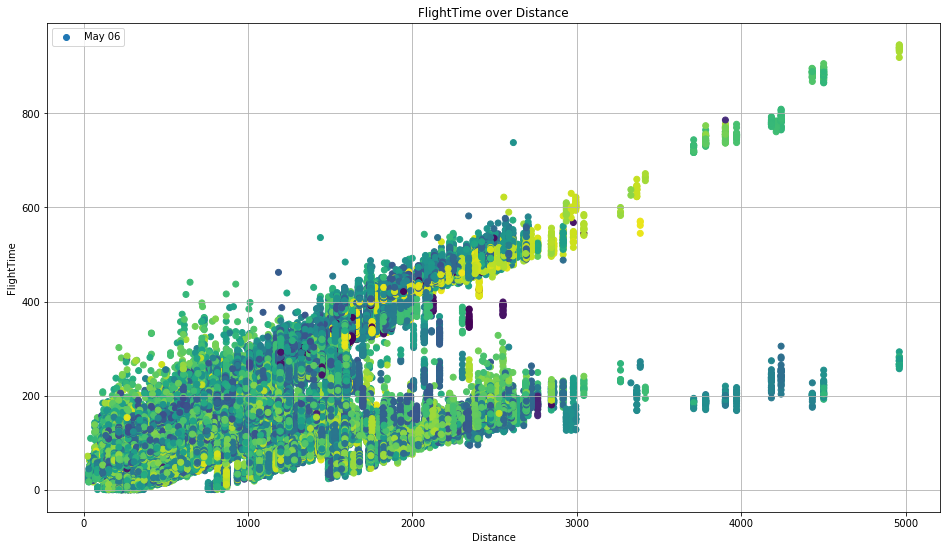

In [38]:
plt.figure(figsize=(16, 9))
plt.scatter(df.Distance, df.FlightTime, c=df.DepTime, label='May 06')
plt.xlabel('Distance')
plt.ylabel('FlightTime')
plt.title('FlightTime over Distance')
plt.grid()
plt.legend()

In [39]:
# sns.pairplot(df[['DepTime', 'ArrTime', 'Distance', 'FlightTime']].dropna())

### x catégorielle et y numérique

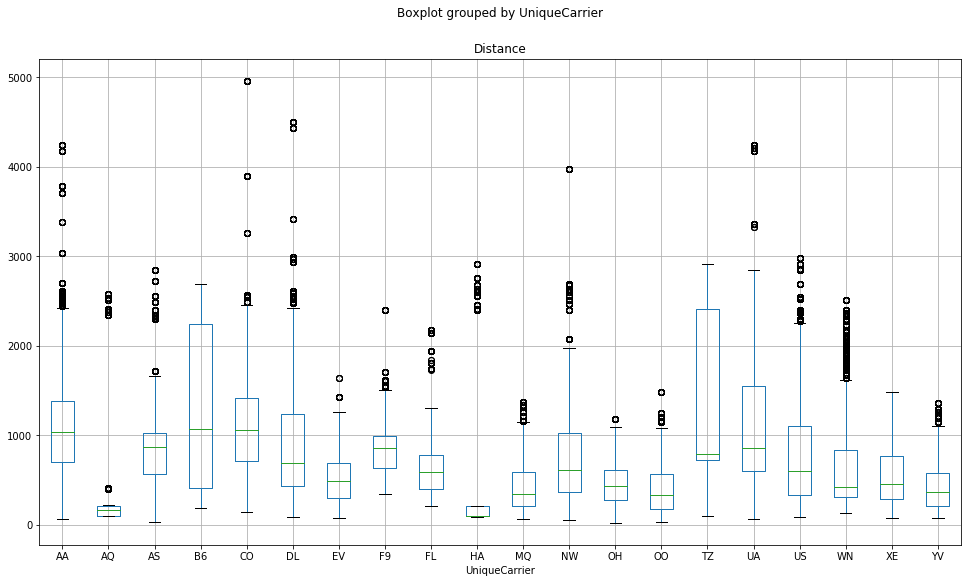

In [40]:
df.boxplot(column='Distance', by='UniqueCarrier', figsize=(16, 9))

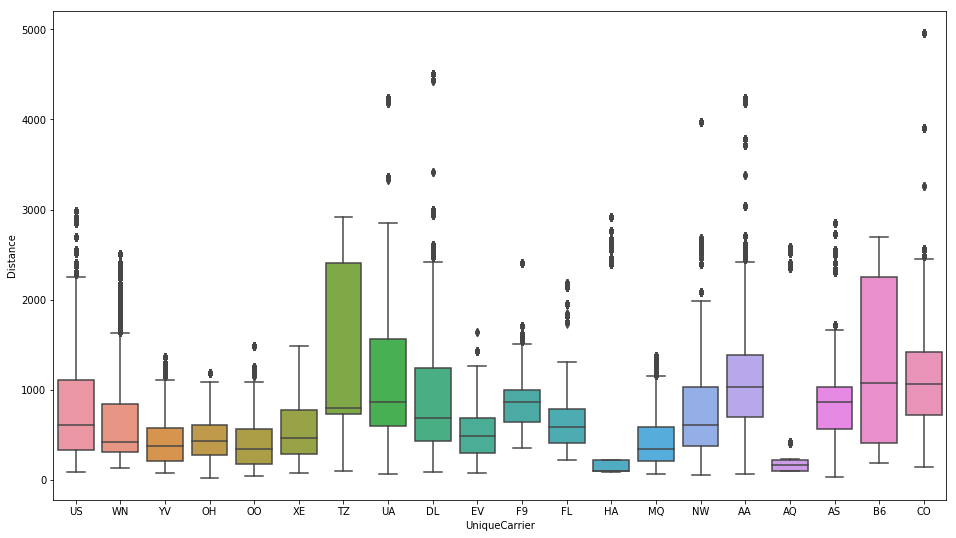

In [41]:
plt.figure(figsize=(16, 9))
sns.boxplot(df.UniqueCarrier, df.Distance)

### x numérique et y catégorielle

In [42]:
df['Late'] = [True if x + y + z + t + u > 0 else False for x, y, z, t, u in zip(df.CarrierDelay, df.WeatherDelay, df.NASDelay, df.SecurityDelay, df.LateAircraftDelay)]

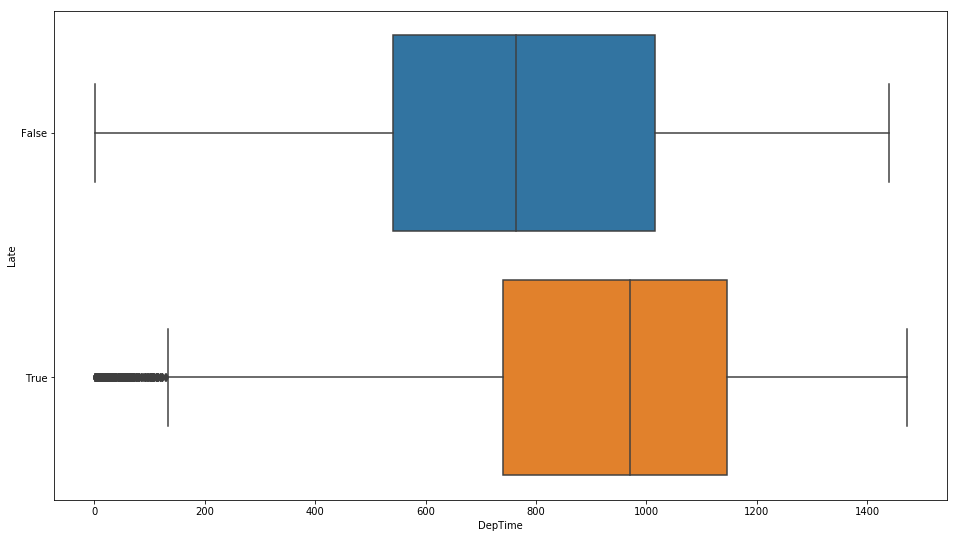

In [43]:
plt.figure(figsize=(16, 9))
sns.boxplot(df.DepTime, df.Late, orient='h')

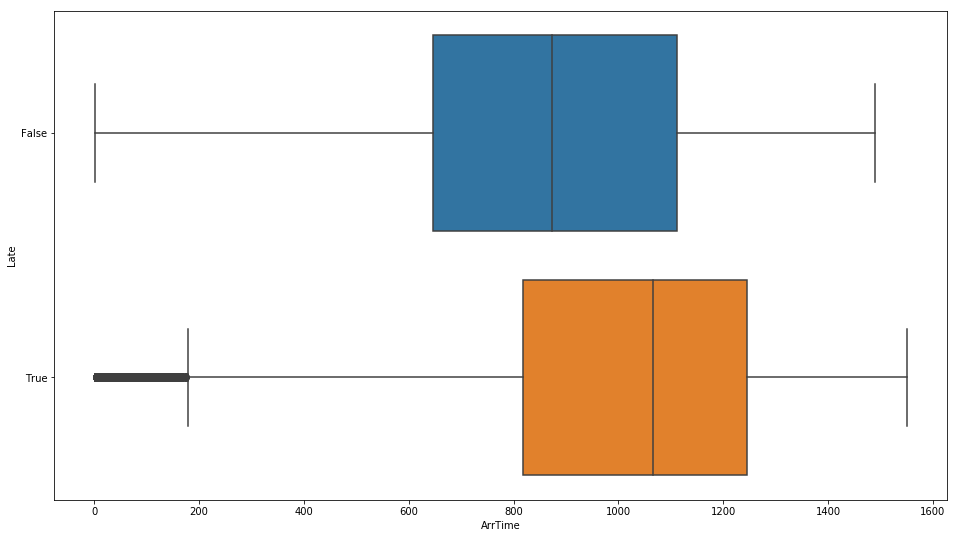

In [44]:
plt.figure(figsize=(16, 9))
sns.boxplot(df.ArrTime, df.Late, orient='h')

### x catégorielle et y catégorielle

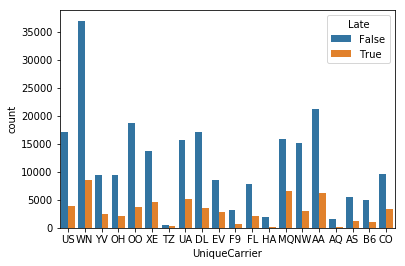

In [45]:
sns.countplot(x="UniqueCarrier", hue="Late", data=df)

In [46]:
txLate = df[['UniqueCarrier', 'Late']].groupby('UniqueCarrier').mean()

In [47]:
txLate

,Late
UniqueCarrier,
AA,0.225312
AQ,0.104444
AS,0.171950
B6,0.178446
CO,0.254727
DL,0.168581
EV,0.250652
F9,0.157470
FL,0.206760


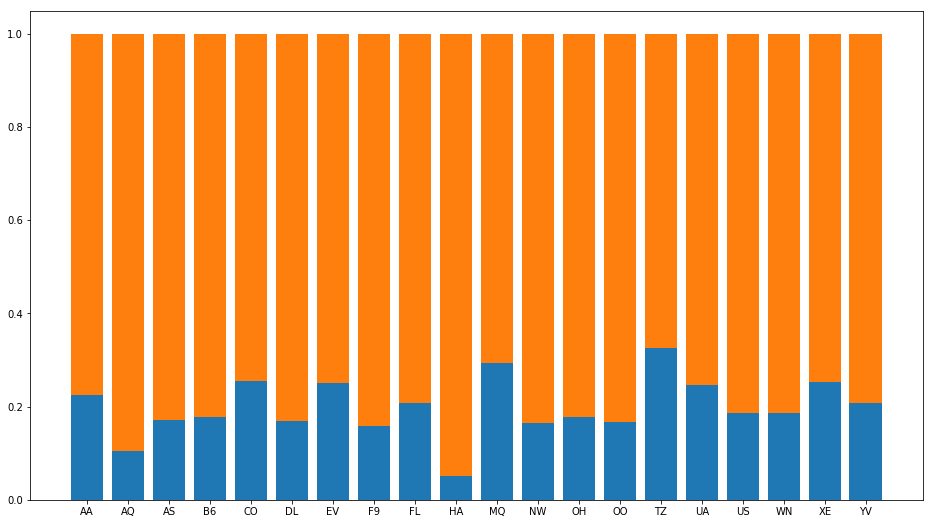

In [48]:
plt.figure(figsize=(16, 9))
p1 = plt.bar(txLate.index, txLate.Late)
p2 = plt.bar(txLate.index, 1-txLate.Late, bottom=txLate.Late)

In [49]:
txLate_jour = df[['DayOfWeek', 'Late']].groupby('DayOfWeek').mean()

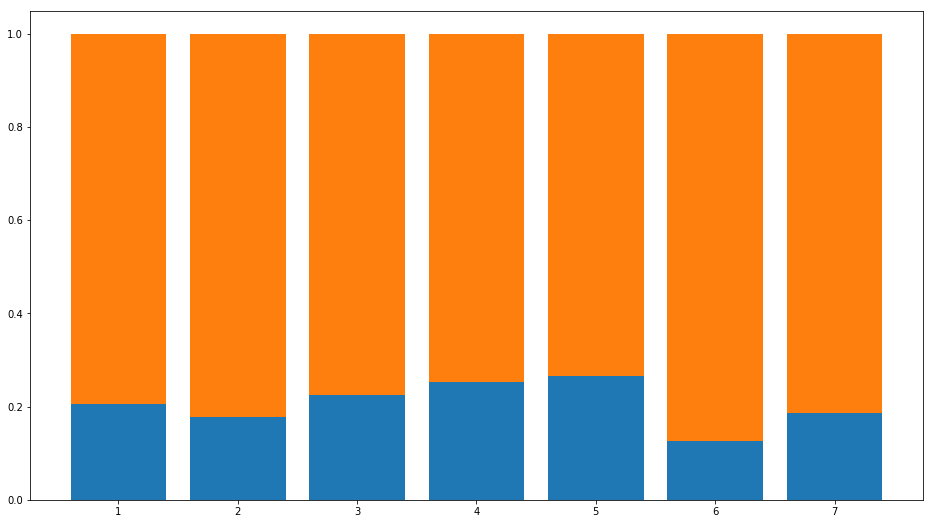

In [50]:
plt.figure(figsize=(16, 9))
p1 = plt.bar(txLate_jour.index, txLate_jour.Late)
p2 = plt.bar(txLate_jour.index, 1-txLate_jour.Late, bottom=txLate_jour.Late)

In [51]:
txLate_jour

,Late
DayOfWeek,
1,0.204939
2,0.178496
3,0.224786
4,0.251852
5,0.266509
6,0.126799
7,0.186666
